# Data 622 Homework 1

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_columns', 120)
plt.style.use('fivethirtyeight')

In [2]:
def run_model(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    model.fit(X_train, y_train)


    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    print(classification_report(y_train, y_hat_train))
    print(classification_report(y_test, y_hat_test))
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
    plt.rcParams.update({'font.size': 16})

    plot_confusion_matrix(model, X_train, y_train, ax=ax0)
    plot_confusion_matrix(model, X_test, y_test, ax=ax1)

    ax0.title.set_text('Train Confusion Matrix')
    ax1.title.set_text('Test Confusion Matrix')
    ax0.grid(False)
    ax1.grid(False)
    
    
    return model

## First Dataset (Small)

I downloaded a dataset containing the NBA player statistics from the 2022-2023 season. I wanted to explore which statistics affect a player's Win Shares(WS). As you will see, I subset the data by Games Played (GP) and average minutes (MP), since a lot of players will enter a game but play inconsequential minutes, which could produce outliers and skew the data.

In [3]:
df_small = pd.read_csv("/Users/mohamedhassan/Downloads/nba_2022-23_all_stats.csv")

In [4]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     539 non-null    int64  
 1   Player Name    539 non-null    object 
 2   Position       539 non-null    object 
 3   Age            539 non-null    int64  
 4   Team           539 non-null    object 
 5   GP             539 non-null    int64  
 6   GS             539 non-null    int64  
 7   MP             539 non-null    float64
 8   FG             539 non-null    float64
 9   FGA            539 non-null    float64
 10  FG%            537 non-null    float64
 11  3P             539 non-null    float64
 12  3PA            539 non-null    float64
 13  3P%            523 non-null    float64
 14  2P             539 non-null    float64
 15  2PA            539 non-null    float64
 16  2P%            534 non-null    float64
 17  eFG%           537 non-null    float64
 18  FT        

In [5]:
df_small.shape

(539, 51)

In [6]:
df_small.reset_index(drop=True)

,Unnamed: 0,Player Name,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Nickeil Alexander-Walker,SG,24,MIN/UTA,59,3,15.0,2.2,5.0,0.444,1.0,2.7,0.384,1.2,2.3,0.515,0.547,0.7,1.0,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2,884,11.6,0.565,0.539,0.203,1.9,10.5,6.3,16.7,1.7,2.0,14.6,17.9,0.3,0.8,1.1,0.062,-1.4,0.4,-0.9,0.2
1,1,Ryan Arcidiacono,PG,28,NYK/POR,20,4,8.6,0.5,1.9,0.243,0.4,1.2,0.348,0.1,0.7,0.071,0.351,0.0,0.0,NaN,0.0,0.8,0.8,1.2,0.3,0.0,0.4,0.9,1.3,172,2.7,0.351,0.622,0.000,0.0,10.0,5.0,16.9,1.4,0.0,15.9,11.1,-0.2,0.1,-0.2,-0.043,-7.3,-1.5,-8.8,-0.3
2,2,Mo Bamba,C,24,LAL/ORL,49,7,15.7,2.4,4.9,0.485,1.0,2.5,0.387,1.4,2.4,0.590,0.585,0.8,1.3,0.661,1.2,3.4,4.6,0.9,0.3,0.9,0.6,2.1,6.6,769,15.7,0.602,0.515,0.257,8.5,24.2,16.4,8.7,0.8,5.3,10.1,16.6,1.1,1.1,2.2,0.139,-0.2,0.7,0.5,0.5
3,3,Will Barton,SG,32,WAS/TOR,56,2,17.7,2.5,6.5,0.379,1.2,3.2,0.367,1.3,3.3,0.391,0.470,0.7,0.8,0.787,0.3,2.2,2.4,2.0,0.5,0.2,0.9,1.0,6.8,993,10.0,0.493,0.495,0.129,1.7,13.5,7.7,15.4,1.4,1.1,11.1,18.9,-0.4,0.8,0.4,0.021,-2.0,-0.6,-2.6,-0.2
4,4,Darius Bazley,C,22,OKC/PHO,43,1,14.3,1.9,4.3,0.454,0.5,1.2,0.377,1.5,3.0,0.485,0.508,0.9,1.6,0.543,0.8,2.4,3.2,0.9,0.5,0.8,0.6,1.0,5.2,616,13.1,0.524,0.290,0.383,5.8,18.5,12.1,8.3,1.7,5.1,11.2,16.4,0.1,0.9,1.0,0.078,-2.0,1.0,-1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,534,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,795,14.1,0.573,0.172,0.131,9.4,14.6,11.8,12.9,3.4,0.6,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4
535,535,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,2541,22.0,0.573,0.331,0.460,2.4,7.0,4.7,42.5,1.5,0.3,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4
536,536,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,83,16.7,0.675,0.259,0.222,10.9,21.9,16.2,3.9,1.2,2.5,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0
537,537,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5,217,16.4,0.659,0.034,0.593,13.0,21.8,17.3,7.2,0.7,1.9,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0


In [7]:
#dropped "Unnamed: 0" column
df_small.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
df_small

,Player Name,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Nickeil Alexander-Walker,SG,24,MIN/UTA,59,3,15.0,2.2,5.0,0.444,1.0,2.7,0.384,1.2,2.3,0.515,0.547,0.7,1.0,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2,884,11.6,0.565,0.539,0.203,1.9,10.5,6.3,16.7,1.7,2.0,14.6,17.9,0.3,0.8,1.1,0.062,-1.4,0.4,-0.9,0.2
1,Ryan Arcidiacono,PG,28,NYK/POR,20,4,8.6,0.5,1.9,0.243,0.4,1.2,0.348,0.1,0.7,0.071,0.351,0.0,0.0,NaN,0.0,0.8,0.8,1.2,0.3,0.0,0.4,0.9,1.3,172,2.7,0.351,0.622,0.000,0.0,10.0,5.0,16.9,1.4,0.0,15.9,11.1,-0.2,0.1,-0.2,-0.043,-7.3,-1.5,-8.8,-0.3
2,Mo Bamba,C,24,LAL/ORL,49,7,15.7,2.4,4.9,0.485,1.0,2.5,0.387,1.4,2.4,0.590,0.585,0.8,1.3,0.661,1.2,3.4,4.6,0.9,0.3,0.9,0.6,2.1,6.6,769,15.7,0.602,0.515,0.257,8.5,24.2,16.4,8.7,0.8,5.3,10.1,16.6,1.1,1.1,2.2,0.139,-0.2,0.7,0.5,0.5
3,Will Barton,SG,32,WAS/TOR,56,2,17.7,2.5,6.5,0.379,1.2,3.2,0.367,1.3,3.3,0.391,0.470,0.7,0.8,0.787,0.3,2.2,2.4,2.0,0.5,0.2,0.9,1.0,6.8,993,10.0,0.493,0.495,0.129,1.7,13.5,7.7,15.4,1.4,1.1,11.1,18.9,-0.4,0.8,0.4,0.021,-2.0,-0.6,-2.6,-0.2
4,Darius Bazley,C,22,OKC/PHO,43,1,14.3,1.9,4.3,0.454,0.5,1.2,0.377,1.5,3.0,0.485,0.508,0.9,1.6,0.543,0.8,2.4,3.2,0.9,0.5,0.8,0.6,1.0,5.2,616,13.1,0.524,0.290,0.383,5.8,18.5,12.1,8.3,1.7,5.1,11.2,16.4,0.1,0.9,1.0,0.078,-2.0,1.0,-1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,795,14.1,0.573,0.172,0.131,9.4,14.6,11.8,12.9,3.4,0.6,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4
535,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,2541,22.0,0.573,0.331,0.460,2.4,7.0,4.7,42.5,1.5,0.3,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4
536,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,83,16.7,0.675,0.259,0.222,10.9,21.9,16.2,3.9,1.2,2.5,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0
537,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5,217,16.4,0.659,0.034,0.593,13.0,21.8,17.3,7.2,0.7,1.9,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0


In [9]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player Name    539 non-null    object 
 1   Position       539 non-null    object 
 2   Age            539 non-null    int64  
 3   Team           539 non-null    object 
 4   GP             539 non-null    int64  
 5   GS             539 non-null    int64  
 6   MP             539 non-null    float64
 7   FG             539 non-null    float64
 8   FGA            539 non-null    float64
 9   FG%            537 non-null    float64
 10  3P             539 non-null    float64
 11  3PA            539 non-null    float64
 12  3P%            523 non-null    float64
 13  2P             539 non-null    float64
 14  2PA            539 non-null    float64
 15  2P%            534 non-null    float64
 16  eFG%           537 non-null    float64
 17  FT             539 non-null    float64
 18  FTA       

In [10]:
df_small.describe()

,Age,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,537.000000,539.000000,539.000000,523.000000,539.000000,539.000000,534.000000,537.000000,539.000000,539.000000,515.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,537.000000,537.000000,537.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,538.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.727273,48.040816,22.820037,19.796846,3.348980,7.104638,0.464983,0.990538,2.782560,0.324952,2.359555,4.322820,0.534858,0.533862,1.434694,1.856957,0.753468,0.866234,2.676623,3.543043,2.068831,0.609647,0.382375,1.103711,1.688126,9.121336,1103.593692,13.322635,0.562678,0.401803,0.251101,5.220594,14.930056,10.072542,13.479221,1.523562,1.828200,12.593866,18.493692,1.214471,1.119295,2.334137,0.081698,-1.318182,-0.102412,-1.420965,0.550278
std,4.290326,24.650686,27.295285,9.544958,2.436261,4.956779,0.106153,0.872442,2.244579,0.127414,1.972402,3.514788,0.131178,0.101271,1.545867,1.880798,0.148548,0.747543,1.773140,2.347046,1.933079,0.398533,0.384414,0.826909,0.792206,6.842216,827.778918,6.108055,0.097358,0.218845,0.181984,4.272294,6.545425,4.695401,8.695977,1.300622,2.424577,6.923244,5.863766,1.793621,0.994314,2.579326,0.085737,3.503663,2.150632,4.764528,1.219077
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-20.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,23.000000,30.500000,1.000000,12.450000,1.600000,3.400000,0.417000,0.300000,1.000000,0.288500,0.900000,1.850000,0.487000,0.496000,0.500000,0.600000,0.691000,0.300000,1.400000,1.800000,0.800000,0.300000,0.100000,0.500000,1.200000,4.150000,329.000000,10.200000,0.524000,0.261000,0.143000,2.100000,10.700000,6.750000,7.400000,1.000000,0.700000,9.425000,14.400000,0.000000,0.300000,0.300000,0.046000,-2.900000,-0.900000,-3.300000,-0.100000
50%,25.000000,54.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,2.400000,0.345000,1.700000,3.200000,0.537500,0.538000,0.900000,1.200000,0.769000,0.700000,2.300000,3.000000,1.400000,0.600000,0.300000,0.900000,1.600000,7.000000,970.000000,13.000000,0.567000,0.409000,0.229000,3.900000,13.500000,8.900000,11.100000,1.400000,1.200000,11.850000,17.700000,0.600000,0.900000,1.600000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,28.500000,68.000000,46.500000,28.350000,4.500000,9.450000,0.506000,1.500000,4.100000,0.385500,3.300000,6.000000,0.594750,0.576000,1.850000,2.400000,0.843500,1.100000,3.500000,4.500000,2.750000,0.800000,0.500000,1.500000,2.200000,12.100000,1846.000000,16.350000,0.609000,0.547000,0.323000,7.050000,18.600000,12.550000,17.700000,1.700000,2.400000,15.000000,21.200000,1.800000,1.800000,3.500000,0.129500,0.450000,0.750000,0.600000,0.800000
max,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,1.000000,10.500000,17.800000,1.000000,1.000000,10.000000,12.300000,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,3.000000,4.100000,5.000000,33.100000,2963.000000,65.600000,1.064000,1.000000,2.000000,28.800000,55.400000,29.600000,47.600000,24.200000,44.100000,100.000000,52.500000,11.200000,4.800000,14.900000,0.626000,17.000000,32.700000,48.600000,8.800000


In [11]:
df_small.isna().sum()

Player Name       0
Position          0
Age               0
Team              0
GP                0
GS                0
MP                0
FG                0
FGA               0
FG%               2
3P                0
3PA               0
3P%              16
2P                0
2PA               0
2P%               5
eFG%              2
FT                0
FTA               0
FT%              24
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
Total Minutes     0
PER               0
TS%               2
3PAr              2
FTr               2
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
TOV%              1
USG%              0
OWS               0
DWS               0
WS                0
WS/48             0
OBPM              0
DBPM              0
BPM               0
VORP              0


In [12]:
df_small.duplicated().sum()

0

In [13]:
df_small["GP"].value_counts()

67    17
76    15
63    14
56    14
74    13
      ..
19     1
24     1
26     1
30     1
83     1
Name: GP, Length: 81, dtype: int64

In [14]:
# Checking for initial correlation with Win Shares (WS)
corr_small = df_small.corr()['WS'].reset_index()
corr_small = corr_small.sort_values([('WS')], ascending = False)
corr_small

,index,WS
41,WS,1.000000
39,OWS,0.960275
46,VORP,0.894939
40,DWS,0.864079
26,Total Minutes,0.795309
2,GS,0.759685
10,2P,0.745269
18,DRB,0.744445
4,FG,0.742585
25,PTS,0.740545


In [15]:
df_small.corr().style.background_gradient(cmap="Blues")

,Age,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Age,1.000000,0.080564,0.095957,0.133591,0.089555,0.083268,0.056815,0.149525,0.129907,0.092857,0.044184,0.034877,0.062868,0.112599,0.082199,0.066081,0.101328,-0.019278,0.106741,0.074118,0.166771,0.080247,0.022212,0.077355,0.078069,0.101426,0.102893,0.076293,0.115045,0.080883,-0.010980,-0.071286,0.005879,-0.023689,0.149977,-0.029458,-0.044413,0.035262,-0.025603,0.163943,0.143149,0.167986,0.145897,0.132807,0.097167,0.141953,0.184156
GP,0.080564,1.000000,0.641064,0.649675,0.513014,0.506479,0.208523,0.405484,0.406479,0.123175,0.454405,0.454634,0.143179,0.239557,0.392619,0.392901,0.149347,0.325323,0.506849,0.486237,0.340165,0.414046,0.310445,0.404578,0.514726,0.506893,0.877481,0.261155,0.270939,-0.071860,0.025008,-0.049020,0.062714,0.023332,0.125304,-0.096494,-0.023080,-0.098030,0.111438,0.512987,0.752334,0.646602,0.293272,0.390922,0.075064,0.321194,0.371950
GS,0.095957,0.641064,1.000000,0.828853,0.758037,0.745358,0.176028,0.518579,0.529891,0.063798,0.706945,0.712725,0.090144,0.170034,0.633614,0.635633,0.156928,0.407388,0.681401,0.643836,0.566952,0.563894,0.403713,0.643229,0.610872,0.749886,0.880431,0.371565,0.219524,-0.128591,0.109483,-0.065426,0.100242,0.041485,0.292707,-0.049369,-0.013228,-0.072161,0.330301,0.662848,0.775857,0.759685,0.287962,0.459566,0.064555,0.366711,0.613138
MP,0.133591,0.649675,0.828853,1.000000,0.879244,0.883501,0.164583,0.682839,0.696892,0.163168,0.783091,0.800698,0.119937,0.199210,0.710147,0.708436,0.196029,0.386231,0.750114,0.688273,0.730342,0.721044,0.379248,0.786539,0.752815,0.874258,0.878135,0.406114,0.253861,-0.057508,0.059486,-0.173919,0.036647,-0.052759,0.430286,-0.061141,-0.097442,-0.059441,0.375390,0.628511,0.746557,0.725022,0.321230,0.535015,0.041802,0.412258,0.600507
FG,0.089555,0.513014,0.758037,0.879244,1.000000,0.977333,0.236673,0.659124,0.671131,0.157964,0.943067,0.949772,0.150524,0.222543,0.862378,0.861896,0.183515,0.360724,0.745471,0.676923,0.712958,0.581773,0.364302,0.850130,0.626487,0.991753,0.769085,0.577031,0.291274,-0.186082,0.143511,-0.120524,0.128582,0.036470,0.490013,-0.078160,-0.062357,-0.104054,0.671517,0.689225,0.682023,0.742585,0.366130,0.648207,0.002509,0.477510,0.738955
FGA,0.083268,0.506479,0.745358,0.883501,0.977333,1.000000,0.082673,0.745980,0.775345,0.169313,0.876932,0.915133,0.042713,0.098620,0.842122,0.829497,0.237353,0.242023,0.673896,0.584872,0.741011,0.598583,0.269207,0.849155,0.588195,0.982079,0.770630,0.487539,0.173665,-0.065876,0.080633,-0.224359,0.037485,-0.075123,0.524498,-0.064242,-0.116705,-0.131374,0.693329,0.596198,0.636484,0.660448,0.264765,0.596961,-0.045211,0.418383,0.667685
FG%,0.056815,0.208523,0.176028,0.164583,0.236673,0.082673,1.000000,-0.134025,-0.204878,0.141443,0.350712,0.246991,0.759769,0.911066,0.158612,0.204775,-0.244327,0.479660,0.345760,0.414969,0.013716,0.025793,0.370105,0.155874,0.309307,0.187886,0.172946,0.487115,0.865226,-0.602013,0.306389,0.387984,0.352429,0.423965,-0.100816,-0.228824,0.086257,0.212365,-0.004850,0.361798,0.264125,0.353394,0.537335,0.356333,0.117379,0.314253,0.256739
3P,0.149525,0.405484,0.518579,0.682839,0.659124,0.745980,-0.134025,1.000000,0.981637,0.394008,0.372085,0.425371,-0.044800,0.100305,0.467877,0.416393,0.326139,-0.131135,0.314240,0.194918,0.532019,0.456959,-0.030592,0.534407,0.361631,0.702705,0.593119,0.224285,0.146677,0.445939,-0.162623,-0.454876,-0.217465,-0.356727,0.345590,-0.056267,-0.245728,-0.186576,0.437448,0.345707,0.377280,0.386311,0.140715,0.471130,-0.101681,0.300630,0.402002
3PA,0.129907,0.406479,0.529891,0.696892,0.671131,0.775345,-0.204878,0.981637,1.000000,0.313012,0.394590,0.455081,-0.062554,0.004613,0.496895,0.446908,0.338448,-0.137714,0.328071,0.203078,0.554130,0.467127,-0.031571,0.560261,0.367351,0.715586,0.604220,0.196028,0.059216,0.457980,-0.163114,-0.471565,-0.216046,-0.364017,0.365956,-0.

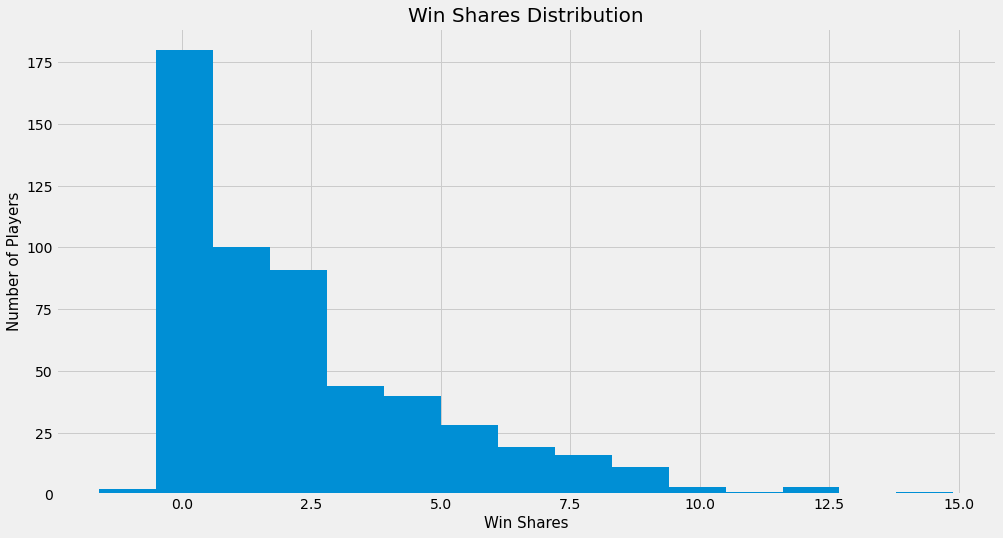

In [16]:
plt.figure(figsize = (15,8))
plt.hist(df_small['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);

The histogram shows a skewness to the right for Win Shares. This isn't surprising, since players may play in some games when the game has already been decided and their impact on their team's win would be insignificant. Therefore, I will subset the data based on the mean of Games Played (GP) and and average minutes played (MP):

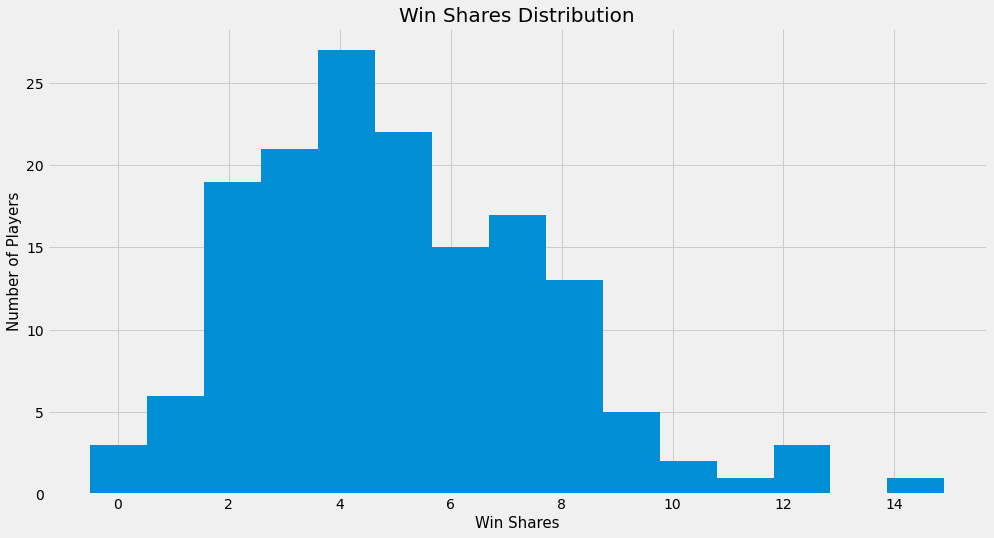

In [17]:
df_small = df_small[df_small['GP'] >= df_small["GP"].mean()]


df_small = df_small[df_small['MP'] > df_small["MP"].mean()]


plt.figure(figsize = (15,8))
plt.hist(df_small['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);

The subsetting of Win Shares based on average minutes and games played helped better normalize the distribution

In [18]:
corr_small = df_small.corr()['WS'].reset_index()
corr_small = corr_small.sort_values([('WS')], ascending = False)
corr_small.reset_index(drop=True, inplace=True)

In [19]:
corr_small

,index,WS
0,WS,1.000000
1,WS/48,0.951545
2,OWS,0.950634
3,VORP,0.903481
4,BPM,0.873740
5,PER,0.817938
6,OBPM,0.764634
7,TS%,0.705666
8,DWS,0.634127
9,FG%,0.606078


When analyzing the correlation coefficients with Win Shares, it's no surprise that Offensive Win Shares (OWS) and Win Shares per 48 Minutes (WS/48) were highly correlated, since they're fairly similar to Win Shares. Therefore, I will drop these two columns, as well as Defensive Win Shares (DWS), since it also similar to Win Shares and may provide skewed results. 

In [20]:
df_small.drop(['OWS', 'DWS', 
                'WS/48'], axis=1, inplace=True)

When examining the rest of the variables' correlation with Win Shares, I was surprised that average points per game (PTS) did not have high correlation with Win Shares. Superstar and All-Star players are known to score a lot of points and help their team win. Additionally, I was surprised average minutes played (MP) and total minutes played (Total Minutes) also did not have high correlation with Win Shares. A possible reason is the data was already subsetted by average minutes played, and thus is already factored into the impact on Win Shares. We can see there are variables that have multicollinearity with each other and may have redundancy. For example, Offensive Box Plus Minus (OBPM) and Defensive Box Plus Minus (DBPM) looks similar to Box Plus Minus (BPM). Additionally, Defensive Rebounds (DRB) and Total Rebounds (TRB) have high multicollinearity with each other. For brevity of this assignment, I will only look at the variables that have a correlation coefficient greater than 70% with Win Shares, with the exception of Offensive Box Plus Minus, since it has high correlation with Box Plus Minus and has less correlation than Box Plus Minus.

In [21]:
corr_small

,index,WS
0,WS,1.000000
1,WS/48,0.951545
2,OWS,0.950634
3,VORP,0.903481
4,BPM,0.873740
5,PER,0.817938
6,OBPM,0.764634
7,TS%,0.705666
8,DWS,0.634127
9,FG%,0.606078


In [22]:
df_small = df_small[['Player Name', 'Position', 'WS', 
                     'PER', 'TS%',  
                     'BPM', 'VORP']].copy()

In [23]:
df_small.columns

Index(['Player Name', 'Position', 'WS', 'PER', 'TS%', 'BPM', 'VORP'], dtype='object')

In [24]:
#corr_small_plot = df_small[['Player Name','PTS','TS%','TRB','VORP','BPM','MP','PER','eFG%','FG%']]


# def feature_corr(x, y, **kwargs):
#     cor = np.corrcoef(x, y)[0][1]
#     ax = plt.gca()
#     ax.annotate("r = {:.2f}".format(cor),
#                 xy=(.5, .1),
#                 xycoords=ax.transAxes,
#                 size = 23)


# plots = sns.PairGrid(df_small)
# plots.map(plt.scatter)
# plots.map(feature_corr);

In [25]:
df_small.corr().style.background_gradient(cmap="Blues")

,WS,PER,TS%,BPM,VORP
WS,1.000000,0.817938,0.705666,0.873740,0.903481
PER,0.817938,1.000000,0.555091,0.916638,0.901531
TS%,0.705666,0.555091,1.000000,0.581929,0.551620
BPM,0.873740,0.916638,0.581929,1.000000,0.982515
VORP,0.903481,0.901531,0.551620,0.982515,1.000000


Although there's high multicollinearity with the remaining variables, I will use them in the upcoming models to gauge its performance.

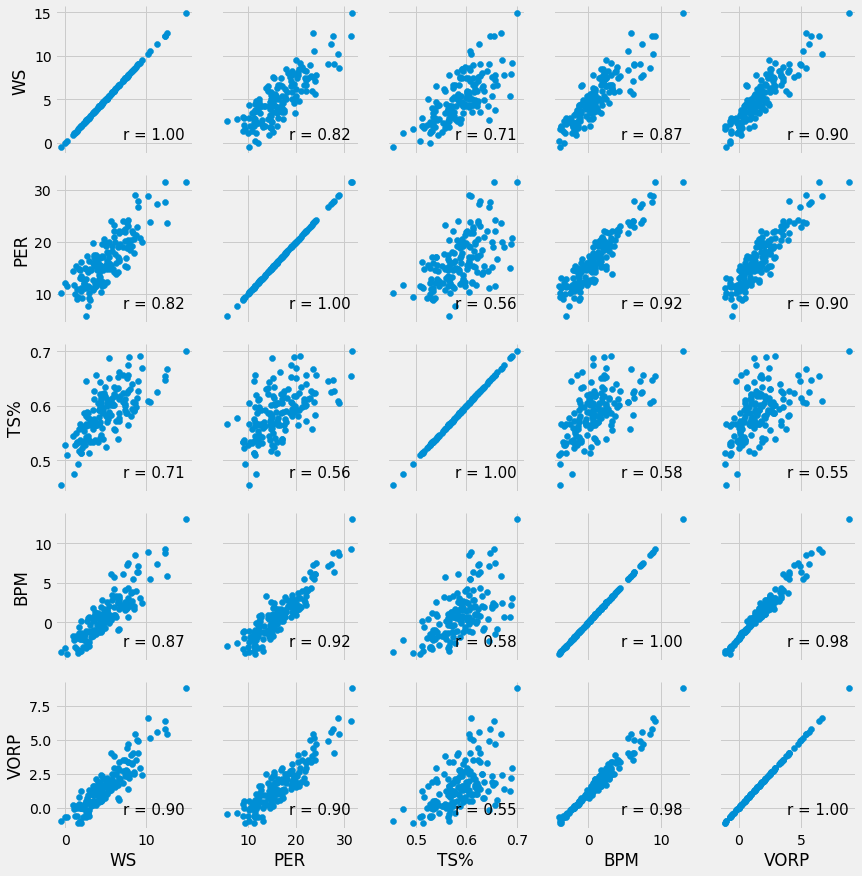

In [26]:
def feature_corr(x, y, **kwargs):
    cor = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(cor),
                xy=(.5, .1),
                xycoords=ax.transAxes,
                size = 15)


plots = sns.PairGrid(df_small)
plots.map(plt.scatter)
plots.map(feature_corr);

In [27]:
df_small_new = df_small.drop(['Player Name', 'Position'], axis=1)

In [28]:
X = df_small_new.drop('WS', axis=1)
y = df_small_new[['WS']]
y.head()

,WS
5,1.4
6,3.0
7,3.9
10,7.5
15,5.5


In [29]:
train, test = train_test_split(df_small_new, test_size=0.25, random_state=99)

x_train = train[['TS%','VORP','PER','BPM']]
y_train = train[['WS']]

x_test = test[['TS%','VORP','PER','BPM']]
y_test = test[['WS']]

### K-Nearest Neighbors

Initially, I tried to use the function that would display a confusion matrix, but since the dependent variable is continuous, it is not conducive to the function and displays an error:

In [30]:
# KNN_model = KNeighborsClassifier()

# run_model(KNN_model, X, y)

# <ipython-input-2-f0c45ee75151>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
#   model.fit(X_train, y_train)
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# <ipython-input-49-facbd3fd0c61> in <module>
#       1 KNN_model = KNeighborsClassifier()
#       2 
# ----> 3 run_model(KNN_model, X, y)

# <ipython-input-2-f0c45ee75151> in run_model(model, X, y)
#       3     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#       4 
# ----> 5     model.fit(X_train, y_train)
#       6 
#       7 

# ~/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/neighbors/_base.py in fit(self, X, y)
#    1144             self.outputs_2d_ = True
#    1145 
# -> 1146         check_classification_targets(y)
#    1147         self.classes_ = []
#    1148         self._y = np.empty(y.shape, dtype=np.int)

# ~/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/multiclass.py in check_classification_targets(y)
#     170     if y_type not in ['binary', 'multiclass', 'multiclass-multioutput',
#     171                       'multilabel-indicator', 'multilabel-sequences']:
# --> 172         raise ValueError("Unknown label type: %r" % y_type)
#     173 
#     174 

# ValueError: Unknown label type: 'continuous'

In [31]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3, weights = 'uniform')
knn.fit(x_train, y_train)

y_knn = knn.predict(x_test)

print('Score: %.3f' % knn.score(x_train, y_train))
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_knn))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_knn))
print('Variance Score: %.3f' % r2_score(y_test, y_knn))

Score: 0.875
Mean Squared Error: 1.389
Mean Absolute error: 0.983
Variance Score: 0.789


### Decision Tree 

In [32]:
d_tree = DecisionTreeRegressor(max_depth=3)
d_tree.fit(x_train, y_train)

y_dtree = d_tree.predict(x_test)

print('Score: %.3f' % d_tree.score(x_train, y_train))
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_dtree))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_dtree))
print('Variance Score: %.3f' % r2_score(y_test, y_dtree))

Score: 0.880
Mean Squared Error: 1.643
Mean Absolute error: 1.061
Variance Score: 0.751


In [33]:
def feat_impt(model):
    
    

    fi = sorted(list(zip(model.feature_importances_, X.columns)))
    fi = pd.DataFrame(fi, columns=['impt', 'name'])
    
    plt.figure(figsize=(15, 10))
    plt.barh(fi.name, fi.impt)
    plt.title('Feature Importances');

    return model

DecisionTreeRegressor(max_depth=3)

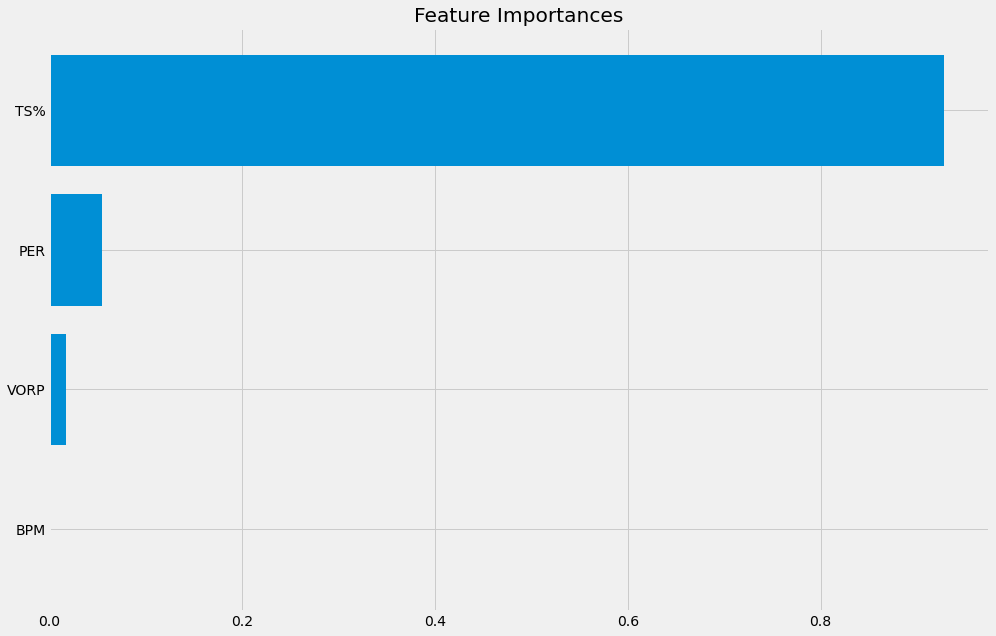

In [34]:
feat_impt(d_tree)

In [35]:
# knn_new = df_test[['BPM','VORP','PER']]

# knn_pred_2018 = knn.predict(knn_new)

# knn_names = df_test.iloc[:, 0]

# c = []
# for i, j in zip(knn_pred_2018, knn_names):
#     c.append({'WS_pred':i,'Player Name':j})


# knn_wins = pd.DataFrame(c)
# knn_wins['WS_pred'] = round(knn_wins['WS_pred'].astype(float),2)

# knn_wins = knn_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
# knn_wins = knn_wins.merge(ws_2018, on = 'Player Name', how = 'inner')


# pos = np.arange(len(knn_wins['WS_pred']))

# plt.style.use('fivethirtyeight')
# fig, ax = plt.subplots(figsize = (15,8))
# plt.bar(pos, knn_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
# plt.bar(pos + 0.4, knn_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3,label = 'Actual',color = 'darkseagreen')
# for i in pos:
#     plt.text(pos[i], 0.5, s = knn_wins['Player Name'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
# plt.text(x = -1.5, y = 18, s = '2018 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
# plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with k-Nearest Neighbors Regression model',fontsize = 19, alpha = .85)
# plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
# plt.xticks([],[])
# plt.legend(prop={'size': 20})
# ax.set_ylabel('Win Shares', size = 25);

### Ridge Regression

In [36]:
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

y_ridgereg = ridge_reg.predict(x_test)

print('Score: %.3f' % ridge_reg.score(x_train, y_train))
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_ridgereg))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_ridgereg))
print('Variance Score: %.3f' % r2_score(y_test, y_ridgereg))

Score: 0.854
Mean Squared Error: 1.356
Mean Absolute error: 0.916
Variance Score: 0.794


## Second Dataset (Large)

For this dataset, I will try to predict made and missed field goals, as well as explore the distribution of two and three-pointers. This dataset captures regular season and playoff shot details from the 1996-1997 to 1999-2000 seasons. For the purposes of this exercise, we will only focus on regular season data. 

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df_large = pd.read_csv("/Users/mohamedhassan/Downloads/shots_log.csv")

In [39]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729649 entries, 0 to 729648
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   GAME_ID              729649 non-null  int64  
 1   GAME_EVENT_ID        729649 non-null  int64  
 2   PLAYER_ID            729649 non-null  int64  
 3   PLAYER_NAME          729642 non-null  object 
 4   TEAM_ID              729649 non-null  int64  
 5   TEAM_NAME            729649 non-null  object 
 6   PERIOD               729649 non-null  int64  
 7   MINUTES_REMAINING    729649 non-null  int64  
 8   SECONDS_REMAINING    729649 non-null  int64  
 9   EVENT_TYPE           729649 non-null  object 
 10  ACTION_TYPE          729649 non-null  object 
 11  SHOT_TYPE            729648 non-null  float64
 12  SHOT_ZONE_BASIC      729649 non-null  object 
 13  SHOT_ZONE_AREA       729649 non-null  object 
 14  SHOT_ZONE_RANGE      729649 non-null  object 
 15  SHOT_DISTANCE    

In [40]:
df_large = df_large[df_large["STAGE"] == "Regular Season"].reset_index(drop=True)

In [41]:
df_large.head()

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON_ID,SEASON,STAGE
0,29600001,4,23,Dennis Rodman,1610612741,Chicago Bulls,1,11,39,Made Shot,Layup Shot,2.0,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961101,BOS,CHI,21996,1996-97 Season,Regular Season
1,29600001,7,133,David Wesley,1610612738,Boston Celtics,1,11,6,Made Shot,Jump Shot,2.0,Mid-Range,Right Side Center(RC),16-24 ft.,20,163,122,1,1,19961101,BOS,CHI,21996,1996-97 Season,Regular Season
2,29600001,43,893,Michael Jordan,1610612741,Chicago Bulls,1,11,6,Missed Shot,Jump Shot,2.0,Mid-Range,Center(C),8-16 ft.,15,45,148,1,0,19961101,BOS,CHI,21996,1996-97 Season,Regular Season
3,29600001,8,677,Eric Williams,1610612738,Boston Celtics,1,11,2,Made Shot,Driving Layup Shot,2.0,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961101,BOS,CHI,21996,1996-97 Season,Regular Season
4,29600001,9,937,Scottie Pippen,1610612741,Chicago Bulls,1,10,46,Made Shot,Layup Shot,2.0,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961101,BOS,CHI,21996,1996-97 Season,Regular Season


In [42]:
df_large.describe()

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,SEASON_ID
count,6.867220e+05,686722.000000,686722.000000,6.867220e+05,686722.000000,686722.000000,686722.000000,686721.000000,686722.000000,686722.000000,686722.000000,686722.0,686722.000000,6.867220e+05,686722.000000
mean,2.974646e+07,225.242465,648.388463,1.610613e+09,2.467118,5.335696,28.702118,2.177464,10.895741,-2.552114,62.593521,1.0,0.448940,1.998216e+07,21997.459033
std,1.168627e+05,140.435381,496.876516,8.508672e+00,1.140412,3.481513,17.451661,0.382061,9.345204,106.668110,79.961557,0.0,0.497386,1.262891e+04,1.168813
min,2.960000e+07,0.000000,2.000000,1.610613e+09,1.000000,0.000000,0.000000,2.000000,0.000000,-248.000000,-51.000000,1.0,0.000000,1.996110e+07,21996.000000
25%,2.960109e+07,101.000000,238.000000,1.610613e+09,1.000000,2.000000,14.000000,2.000000,0.000000,-66.000000,0.000000,1.0,0.000000,1.997041e+07,21996.000000
50%,2.970097e+07,222.000000,467.000000,1.610613e+09,2.000000,5.000000,29.000000,2.000000,11.000000,0.000000,25.000000,1.0,0.000000,1.998032e+07,21997.000000
75%,2.990014e+07,340.000000,938.000000,1.610613e+09,3.000000,8.000000,44.000000,2.000000,19.000000,55.000000,119.000000,1.0,1.000000,1.999112e+07,21999.000000
max,2.990119e+07,744.000000,2000.000000,1.610613e+09,8.000000,12.000000,59.000000,3.000000,87.000000,250.000000,870.000000,1.0,1.000000,2.000042e+07,21999.000000


In [43]:
df_large.isna().sum()

GAME_ID                0
GAME_EVENT_ID          0
PLAYER_ID              0
PLAYER_NAME            7
TEAM_ID                0
TEAM_NAME              0
PERIOD                 0
MINUTES_REMAINING      0
SECONDS_REMAINING      0
EVENT_TYPE             0
ACTION_TYPE            0
SHOT_TYPE              1
SHOT_ZONE_BASIC        0
SHOT_ZONE_AREA         0
SHOT_ZONE_RANGE        0
SHOT_DISTANCE          0
LOC_X                  0
LOC_Y                  0
SHOT_ATTEMPTED_FLAG    0
SHOT_MADE_FLAG         0
GAME_DATE              0
HTM                    0
VTM                    0
SEASON_ID              0
SEASON                 0
STAGE                  0
dtype: int64

We can see that the SHOT_TYPE is missing one value. When examining theACTION_TYPE column of this particular row, the field goal attempt was a Tip Shot, so I filled in the NaN value in SHOT_TYPE to 2:

In [44]:
df_large[df_large['SHOT_TYPE'].isnull()]

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON_ID,SEASON,STAGE
38492,29600245,291,376,Eric Montross,1610612742,Dallas Mavericks,3,7,4,Missed Shot,Tip Shot,NaN,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,0,19961205,DAL,PHI,21996,1996-97 Season,Regular Season


In [45]:
df_large['SHOT_TYPE'] = df_large['SHOT_TYPE'].fillna(2)

In [46]:
df_large.loc[[38492]]

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON_ID,SEASON,STAGE
38492,29600245,291,376,Eric Montross,1610612742,Dallas Mavericks,3,7,4,Missed Shot,Tip Shot,2.0,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,0,19961205,DAL,PHI,21996,1996-97 Season,Regular Season


For the purposes of this assignment, I will only include shots that have a distance of 30 feet or less. The 3 point line dimensions are 22 feet from the basket to the corners of the court, and 23 feet, 9 inches from the basket for the rest of the court. Therefore, shots that are more than 24 feet may be more difficult to score from and may skew the dataset with outliers. 

In [47]:
df_large = df_large[df_large["SHOT_DISTANCE"] <= 30].reset_index(drop=True)

I wanted to take a look and see if shot type was classified correctly based on the shot distance. I looked first at the right and left corner 3 point lines in SHOT_TYPE_BASIC:

In [48]:
df_large["SHOT_ZONE_BASIC"].unique()

array(['Restricted Area', 'Mid-Range', 'In The Paint (Non-RA)',
       'Left Corner 3', 'Right Corner 3', 'Above the Break 3'],
      dtype=object)

In [49]:
df_large[(df_large["SHOT_DISTANCE"] > 22) & (df_large["SHOT_TYPE"] == 2) &
(df_large["SHOT_ZONE_BASIC"] == "Right Corner 3")]

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON_ID,SEASON,STAGE
115173,29600730,84,145,Tracy Murray,1610612764,Washington Bullets,1,1,51,Made Shot,Jump Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,24,242,-1,1,1,19970217,WAS,MIL,21996,1996-97 Season,Regular Season
226638,29700243,180,702,Voshon Lenard,1610612748,Miami Heat,2,5,57,Missed Shot,Jump Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,23,220,83,1,0,19971205,MIA,BOS,21997,1997-98 Season,Regular Season
245270,29700361,60,699,Brent Barry,1610612746,Los Angeles Clippers,1,4,44,Missed Shot,Jump Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,23,220,70,1,0,19971221,BOS,LAC,21997,1997-98 Season,Regular Season
314987,29700800,255,271,Johnny Newman,1610612743,Denver Nuggets,3,9,27,Missed Shot,Jump Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,23,220,83,1,0,19980225,DEN,ATL,21997,1997-98 Season,Regular Season
444963,29800437,124,198,Danny Ferry,1610612739,Cleveland Cavaliers,2,11,1,Made Shot,Jump Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,23,220,76,1,1,19990401,NYK,CLE,21998,1998-99 Season,Regular Season
536076,29900282,378,1496,Keith Van Horn,1610612751,New Jersey Nets,4,4,52,Missed Shot,Jump Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,23,220,74,1,0,19991211,NJN,HOU,21999,1999-00 Season,Regular Season
573714,29900511,474,45,George McCloud,1610612743,Denver Nuggets,4,0,20,Missed Shot,Jump Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,23,220,72,1,0,20000114,DEN,MIA,21999,1999-00 Season,Regular Season
639070,29900912,402,243,Aaron McKie,1610612755,Philadelphia 76ers,3,1,0,Missed Shot,Jump Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,23,220,72,1,0,20000314,CLE,PHI,21999,1999-00 Season,Regular Season
646378,29900958,37,1512,Chris Anstey,1610612741,Chicago Bulls,1,7,13,Missed Shot,Jump Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,23,226,46,1,0,20000320,CHI,ORL,21999,1999-00 Season,Regular Season
662161,29901054,362,689,Theo Ratliff,1610612755,Philadelphia 76ers,4,8,51,Made Shot,Dunk Shot,2.0,Right Corner 3,Right Side(R),24+ ft.,23,233,-14,1,1,20000402,SAC,PHI,21999,1999-00 Season,Regular Season


In [50]:
df_large[(df_large["SHOT_DISTANCE"] > 22) & (df_large["SHOT_TYPE"] == 2) &
(df_large["SHOT_ZONE_BASIC"] == "Left Corner 3")]

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON_ID,SEASON,STAGE
194343,29700040,424,224,Eddie Jones,1610612747,Los Angeles Lakers,4,6,5,Missed Shot,Layup Shot,2.0,Left Corner 3,Left Side(L),24+ ft.,23,-231,42,1,0,19971104,SAC,LAL,21997,1997-98 Season,Regular Season
208104,29700127,282,1532,Jerald Honeycutt,1610612749,Milwaukee Bucks,3,5,14,Made Shot,Jump Shot,2.0,Left Corner 3,Left Side(L),24+ ft.,23,-239,-16,1,1,19971116,SEA,MIL,21997,1997-98 Season,Regular Season
273334,29700539,291,145,Tracy Murray,1610612764,Washington Wizards,3,2,51,Made Shot,Jump Shot,2.0,Left Corner 3,Left Side(L),24+ ft.,24,-237,59,1,1,19980117,WAS,LAC,21997,1997-98 Season,Regular Season


In [51]:
df_large[(df_large["SHOT_DISTANCE"] > 23) & (df_large["SHOT_TYPE"] == 2) &
(df_large["SHOT_ZONE_BASIC"] == "Above the Break 3")]

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON_ID,SEASON,STAGE
64148,29600409,267,959,Steve Nash,1610612756,Phoenix Suns,3,5,40,Made Shot,Jump Shot,2.0,Above the Break 3,Left Side Center(LC),24+ ft.,24,-190,162,1,1,19961228,VAN,PHX,21996,1996-97 Season,Regular Season
65111,29600415,313,265,Harvey Grant,1610612764,Washington Bullets,3,0,27,Made Shot,Jump Shot,2.0,Above the Break 3,Left Side Center(LC),24+ ft.,24,-196,147,1,1,19961230,WAS,CHH,21996,1996-97 Season,Regular Season
107571,29600682,280,913,Larry Johnson,1610612752,New York Knicks,3,8,36,Made Shot,Jump Shot,2.0,Above the Break 3,Center(C),24+ ft.,24,10,249,1,1,19970211,WAS,NYK,21996,1996-97 Season,Regular Season
119655,29600758,221,937,Scottie Pippen,1610612741,Chicago Bulls,3,11,11,Missed Shot,Jump Shot,2.0,Above the Break 3,Left Side Center(LC),24+ ft.,25,-96,231,1,0,19970221,WAS,CHI,21996,1996-97 Season,Regular Season
164364,29601043,212,920,A.C. Green,1610612742,Dallas Mavericks,3,9,36,Made Shot,Tip Shot,2.0,Above the Break 3,Right Side Center(RC),24+ ft.,24,140,197,1,1,19970401,DAL,DET,21996,1996-97 Season,Regular Season
228513,29700255,128,192,Dennis Scott,1610612742,Dallas Mavericks,2,11,22,Made Shot,Jump Shot,2.0,Above the Break 3,Left Side Center(LC),24+ ft.,24,-164,188,1,1,19971206,DAL,HOU,21997,1997-98 Season,Regular Season
241910,29700340,2,765,Hersey Hawkins,1610612760,Seattle SuperSonics,1,11,44,Missed Shot,Jump Shot,2.0,Above the Break 3,Right Side Center(RC),24+ ft.,24,192,150,1,0,19971218,SEA,DEN,21997,1997-98 Season,Regular Season
251076,29700398,302,717,Arvydas Sabonis,1610612757,Portland Trail Blazers,3,3,7,Made Shot,Tip Shot,2.0,Above the Break 3,Right Side Center(RC),24+ ft.,24,173,171,1,1,19971227,UTA,POR,21997,1997-98 Season,Regular Season
255702,29700427,489,1506,Austin Croshere,1610612754,Indiana Pacers,4,1,32,Missed Shot,Jump Shot,2.0,Above the Break 3,Right Side Center(RC),24+ ft.,25,98,231,1,0,19980102,WAS,IND,21997,1997-98 Season,Regular Season
260716,29700459,487,952,Antoine Walker,1610612738,Boston Celtics,4,0,1,Missed Shot,Jump Shot,2.0,Above the Break 3,Center(C),24+ ft.,24,-73,237,1,0,19980106,CHI,BOS,21997,1997-98 Season,Regular Season


In [52]:
df_large[(df_large["SHOT_DISTANCE"] < 23) & (df_large["SHOT_TYPE"] == 3) &
(df_large["SHOT_ZONE_BASIC"] == "In The Paint (Non-RA)")]

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON_ID,SEASON,STAGE
531800,29900256,385,85,Brent Price,1610612763,Vancouver Grizzlies,4,8,13,Made Shot,Jump Shot,3.0,In The Paint (Non-RA),Right Side(R),8-16 ft.,11,61,100,1,1,19991207,DAL,VAN,21999,1999-00 Season,Regular Season


In [53]:
df_large[(df_large["SHOT_DISTANCE"] > 23) & (df_large["SHOT_TYPE"] == 2) &
(df_large["SHOT_ZONE_BASIC"] == "Mid-Range")]

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON_ID,SEASON,STAGE


I reclassified shots type as a 2 or 3 according the shot distance and the shot zone description:

In [54]:
df_large.loc[(df_large["SHOT_ZONE_BASIC"] == "Right Corner 3") & (df_large["SHOT_DISTANCE"] > 22), "SHOT_TYPE"] = 3
df_large.loc[(df_large["SHOT_ZONE_BASIC"] == "Left Corner 3") & (df_large["SHOT_DISTANCE"] > 22), "SHOT_TYPE"] = 3
df_large.loc[(df_large["SHOT_ZONE_BASIC"] == "Above the Break 3") & (df_large["SHOT_DISTANCE"] > 23), "SHOT_TYPE"] = 3
df_large.loc[(df_large["SHOT_ZONE_BASIC"] == "In The Paint (Non-RA)") & (df_large["SHOT_DISTANCE"] < 23), "SHOT_TYPE"] = 2

In [55]:
df_large

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON_ID,SEASON,STAGE
0,29600001,4,23,Dennis Rodman,1610612741,Chicago Bulls,1,11,39,Made Shot,Layup Shot,2.0,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961101,BOS,CHI,21996,1996-97 Season,Regular Season
1,29600001,7,133,David Wesley,1610612738,Boston Celtics,1,11,6,Made Shot,Jump Shot,2.0,Mid-Range,Right Side Center(RC),16-24 ft.,20,163,122,1,1,19961101,BOS,CHI,21996,1996-97 Season,Regular Season
2,29600001,43,893,Michael Jordan,1610612741,Chicago Bulls,1,11,6,Missed Shot,Jump Shot,2.0,Mid-Range,Center(C),8-16 ft.,15,45,148,1,0,19961101,BOS,CHI,21996,1996-97 Season,Regular Season
3,29600001,8,677,Eric Williams,1610612738,Boston Celtics,1,11,2,Made Shot,Driving Layup Shot,2.0,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961101,BOS,CHI,21996,1996-97 Season,Regular Season
4,29600001,9,937,Scottie Pippen,1610612741,Chicago Bulls,1,10,46,Made Shot,Layup Shot,2.0,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961101,BOS,CHI,21996,1996-97 Season,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684139,29901189,466,1742,Shammond Williams,1610612760,Seattle SuperSonics,4,1,14,Made Shot,Driving Layup Shot,2.0,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,20000419,SEA,LAC,21999,1999-00 Season,Regular Season
684140,29901189,468,1838,Tyrone Nesby,1610612746,Los Angeles Clippers,4,0,55,Missed Shot,Jump Shot,3.0,Right Corner 3,Right Side(R),24+ ft.,22,226,10,1,0,20000419,SEA,LAC,21999,1999-00 Season,Regular Season
684141,29901189,470,1740,Rashard Lewis,1610612760,Seattle SuperSonics,4,0,47,Missed Shot,Jump Shot,3.0,Right Corner 3,Right Side(R),24+ ft.,22,226,16,1,0,20000419,SEA,LAC,21999,1999-00 Season,Regular Season
684142,29901189,487,1740,Rashard Lewis,1610612760,Seattle SuperSonics,4,0,15,Missed Shot,Jump Shot,3.0,Above the Break 3,Right Side Center(RC),24+ ft.,25,162,194,1,0,20000419,SEA,LAC,21999,1999-00 Season,Regular Season


I wanted to explore the percentage breakdown of two and three point attempts, as well as shooting percentage of shots made and the distance of each type of shot attempts:

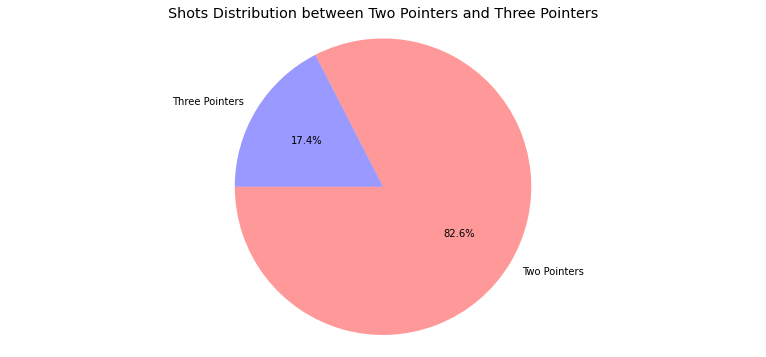

In [56]:
df_large_copy = df_large.copy()
colors = sns.color_palette()[0]
shot_types = ['Two Pointers', 'Three Pointers']

shots_type = df_large_copy.groupby('SHOT_TYPE')['SHOT_TYPE'].count()


plt.figure(figsize=[12, 6]);
plt.pie(shots_type, labels=shot_types, autopct='%1.1f%%', shadow=False, startangle=180, colors=['r', 'b'],wedgeprops={'alpha':0.4})
plt.title('Shots Distribution between Two Pointers and Three Pointers');
plt.axis('equal');

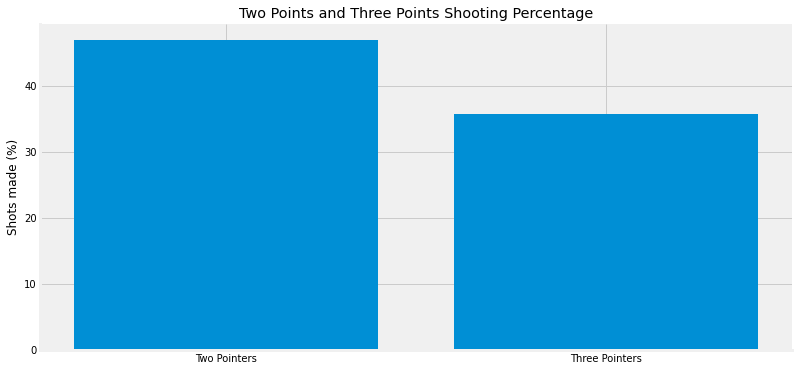

In [57]:
two_pointers_pct = df_large_copy.query('SHOT_TYPE == 2 and SHOT_MADE_FLAG == "1"')['SHOT_TYPE'].count() / df_large_copy[df_large_copy.SHOT_TYPE == 2]['SHOT_TYPE'].count()
three_pointers_pct = df_large_copy.query('SHOT_TYPE == 3 and SHOT_MADE_FLAG == "1"')['SHOT_TYPE'].count() / df_large_copy[df_large_copy.SHOT_TYPE == 3]['SHOT_TYPE'].count()
shots_pct = [two_pointers_pct * 100, three_pointers_pct  * 100]

plt.figure(figsize = [12, 6]);
plt.bar(x=['Two Pointers', 'Three Pointers'], height=shots_pct);
plt.ylabel('Shots made (%)');
plt.title('Two Points and Three Points Shooting Percentage');
sns.despine(left=False, bottom=False, right=True)

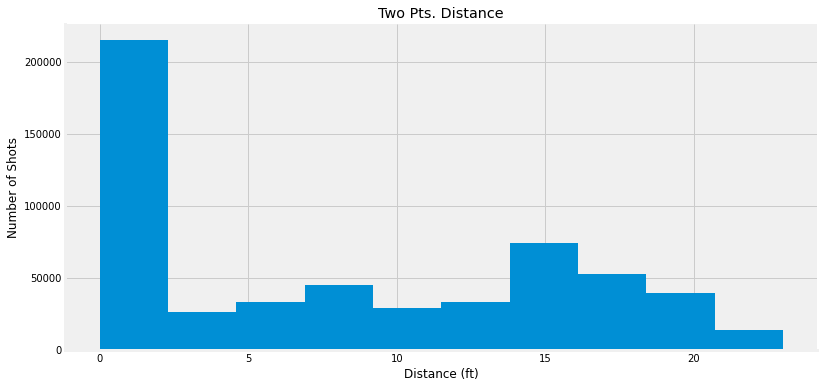

In [58]:
two_pts = df_large_copy[df_large_copy.SHOT_TYPE == 2]
three_pts = df_large_copy[df_large_copy.SHOT_TYPE == 3]

plt.figure(figsize = [12, 6]);

# Two pointers
bin_edges = np.arange(0, int(two_pts.SHOT_DISTANCE.max()) + 1, 5) 
plt.title('Two Pts. Distance');
plt.xlabel('Distance (ft)');
plt.ylabel('Number of Shots');
plt.hist(two_pts.SHOT_DISTANCE);
plt.xticks(bin_edges, bin_edges);
sns.despine(left=False, bottom=False, right=True)

In [59]:
# two_pts = df_large_copy[df_large_copy.SHOT_TYPE == 2]
# three_pts = df_large_copy[df_large_copy.SHOT_TYPE == 3]

# plt.figure(figsize = [12, 6]);

# # Two pointers
# bin_edges = np.arange(0, int(two_pts.SHOT_DISTANCE.max()) + 1, 5) 
# plt.title('Two Pts. Distance');
# plt.xlabel('Distance (ft)');
# plt.hist(two_pts.SHOT_DISTANCE);
# plt.xticks(bin_edges, bin_edges);
# sns.despine(left=False, bottom=False, right=True)

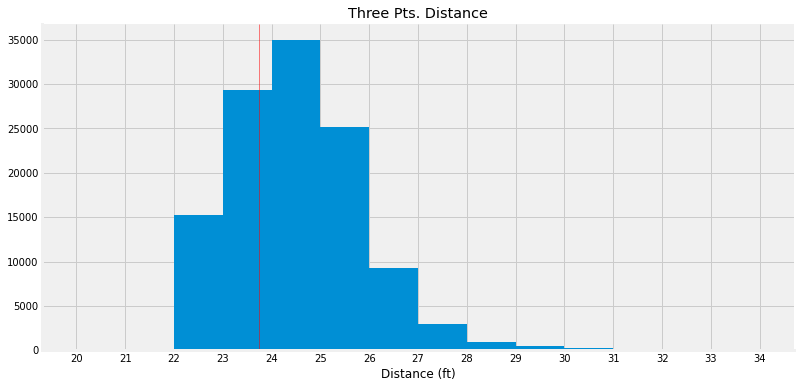

In [60]:
plt.figure(figsize = [12, 6]);
# Three pointers
bin_edges = np.arange(20, 35, 1)
plt.hist(three_pts.SHOT_DISTANCE, bins=bin_edges)
plt.axvline(x=23.75, linewidth=0.5, color='r');
plt.title('Three Pts. Distance');
plt.xticks(bin_edges, bin_edges);
plt.xlabel('Distance (ft)');
sns.despine(left=False, bottom=False, right=True)

<ipython-input-74-b174334e19ea>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


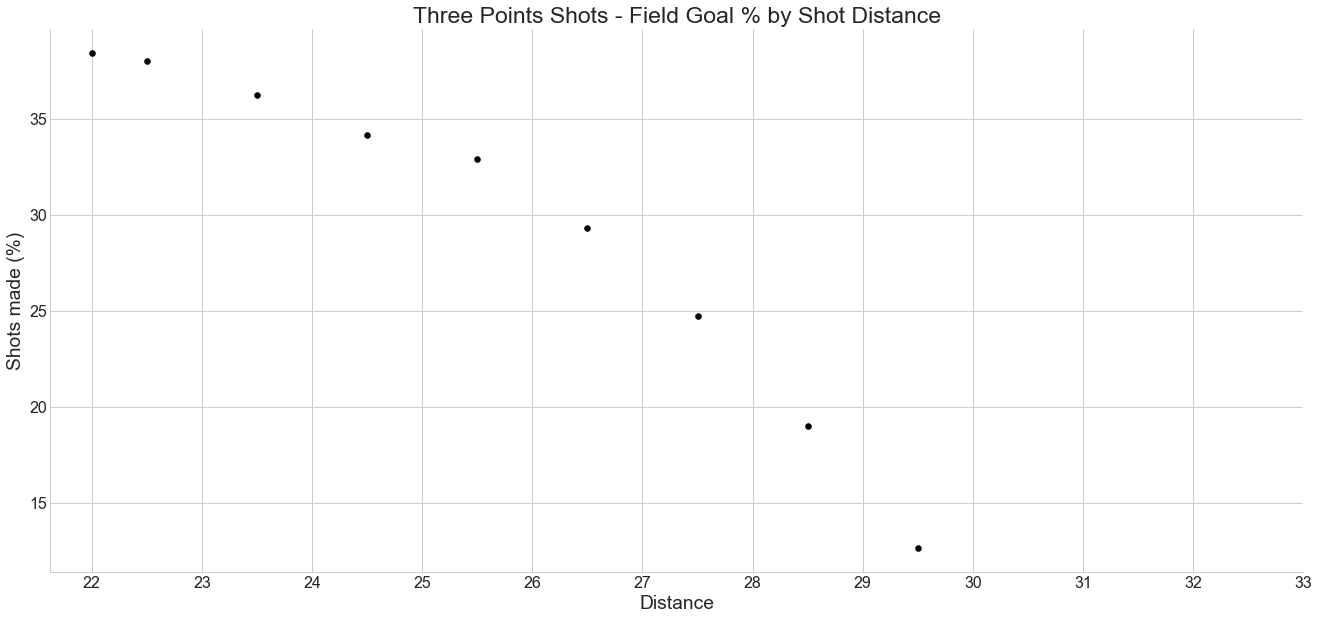

In [74]:
plt.figure(figsize = [20, 10]);

bins_size = np.arange(22, three_pts.SHOT_DISTANCE.max() + 3.3, 0.5)
bins_labels = bins_size[:-1]
three_pts_plot_labels = np.arange(22, int(three_pts.SHOT_DISTANCE.max()) + 4, 1)

three_pts.loc[:, 'shot_bin'] = pd.cut(three_pts.SHOT_DISTANCE, bins =bins_size, labels = bins_labels, include_lowest = True)

three_pts_by_bins = three_pts.groupby(['shot_bin', 'SHOT_MADE_FLAG']).count()

three_pts_by_bins = three_pts_by_bins.reset_index()
three_pts_by_bins = three_pts_by_bins.pivot(index = "shot_bin", columns="SHOT_MADE_FLAG", values="GAME_ID")

# setting NaN to 0
#three_pts_by_bins.loc[three_pts_by_bins.missed.isna(), "missed"] = 0
#three_pts_by_bins.loc[three_pts_by_bins.made.isna(), "made"] = 0

#three_pts_by_bins.loc[:, 'made'] = three_pts_by_bins.made.round(0).astype(int)
#three_pts_by_bins.loc[:, 'missed'] = three_pts_by_bins.missed.round(0).astype(int)

three_pts_by_bins.loc[:, 'dist_pct'] = three_pts_by_bins[1] / (three_pts_by_bins[1] + three_pts_by_bins[0]) * 100
three_pts_by_bins.loc[three_pts_by_bins.dist_pct.isna(), "pct"] = 0

plt.scatter(x = three_pts_by_bins.index, y = three_pts_by_bins.dist_pct).set_facecolor("black");
plt.xticks(three_pts_plot_labels, three_pts_plot_labels);
plt.ylabel('Shots made (%)');
plt.xlabel('Distance')
plt.title('Three Points Shots - Field Goal % by Shot Distance');
sns.despine(left=False, bottom=False, right=True);
plt.style.use('seaborn-whitegrid')

<ipython-input-75-15cd17525b62>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


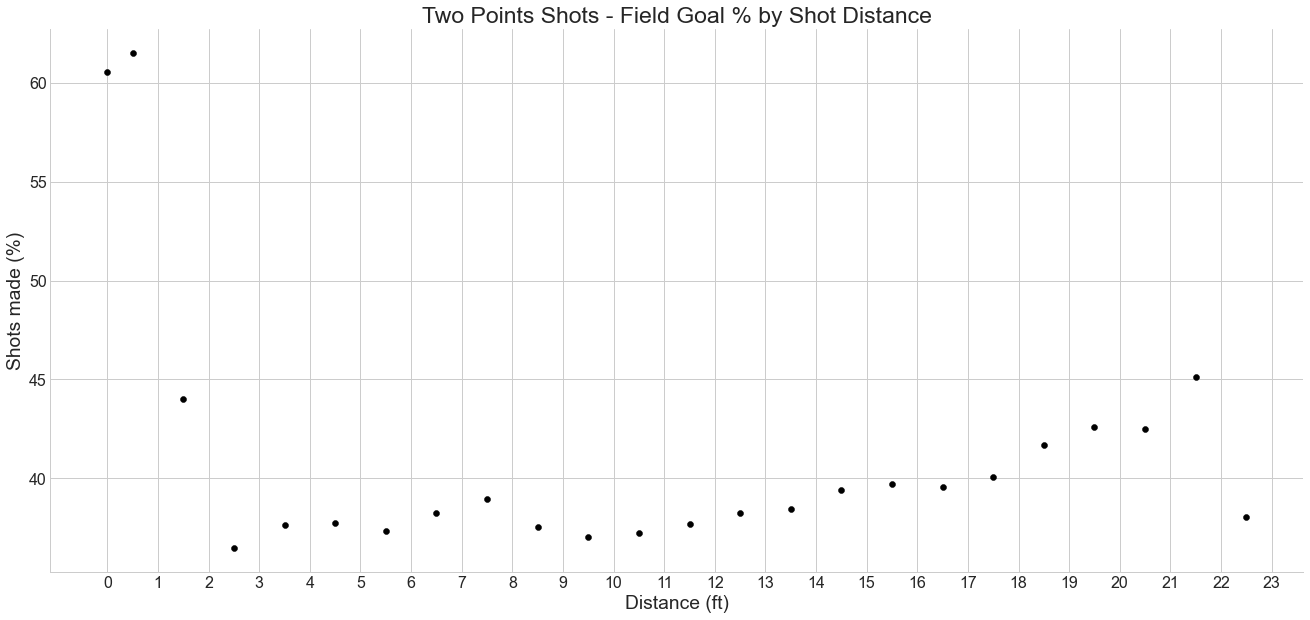

In [75]:
plt.figure(figsize = [20, 10], facecolor="w");

bins_size = np.arange(0, two_pts.SHOT_DISTANCE.max() + 0.8, 0.5)
bins_labels = bins_size[:-1]
two_pts_plot_labels = np.arange(0, int(two_pts.SHOT_DISTANCE.max()) + 1, 1)
two_pts.loc[:, 'shot_bin'] = pd.cut(two_pts.SHOT_DISTANCE, bins = bins_size, labels = bins_labels, include_lowest = True)

two_pts_by_bins = two_pts.groupby(['shot_bin', 'SHOT_MADE_FLAG']).count()
two_pts_by_bins = two_pts_by_bins.reset_index()
two_pts_by_bins = two_pts_by_bins.pivot(index = "shot_bin", columns="SHOT_MADE_FLAG", values="GAME_ID")
two_pts_by_bins.loc[:, 'dist_pct'] = two_pts_by_bins[1] / (two_pts_by_bins[1] + two_pts_by_bins[0]) * 100

plt.scatter(x = two_pts_by_bins.index, y = two_pts_by_bins.dist_pct).set_facecolor("black");
plt.xticks(two_pts_plot_labels, two_pts_plot_labels);
plt.ylabel('Shots made (%)');
plt.xlabel('Distance (ft)');
plt.title('Two Points Shots - Field Goal % by Shot Distance');
sns.despine(left=False, bottom=False, right=True);
plt.style.use('seaborn-whitegrid')

In [63]:
# # Import label encoder 
# from sklearn import preprocessing 
  
# # label_encoder object knows  
# # how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# df_large_copy['SHOT_TYPE']= label_encoder.fit_transform(df_large_copy['SHOT_TYPE']) 
  
# df_large_copy['SHOT_TYPE'].unique() 

In [64]:
# df_large_train = df_large[df_large["SEASON"] != "1999-00 Season"].reset_index(drop=True)

In [65]:
# df_large_test = df_large[df_large["SEASON"] == "1999-00 Season"].reset_index(drop=True)

There aren't many variables in the dataset to choose from to determine its impact on fields goals made and missed. The SHOT_MADE_FLAG already has the made and missed attempts binary-coded, so we don't have to use a .map function to change the values. I will use SHOT_TYPE and SHOT_DISTANCE as the independent variables

In [66]:
df_large_copy = df_large_copy[["SHOT_MADE_FLAG", "SHOT_TYPE", "SHOT_DISTANCE"]]

In [67]:
X = df_large_copy.drop('SHOT_MADE_FLAG', axis=1)
y = df_large_copy[['SHOT_MADE_FLAG']]
y.head()

,SHOT_MADE_FLAG
0,1
1,1
2,0
3,1
4,1


### Logistic Regression

/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.62      0.72      0.67    282071
           1       0.57      0.45      0.50    231037

    accuracy                           0.60    513108
   macro avg       0.59      0.59      0.58    513108
weighted avg       0.60      0.60      0.59    513108

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     93942
           1       0.58      0.45      0.51     77094

    accuracy                           0.60    171036
   macro avg       0.60      0.59      0.59    171036
weighted avg       0.60      0.60      0.59    171036



LogisticRegression()

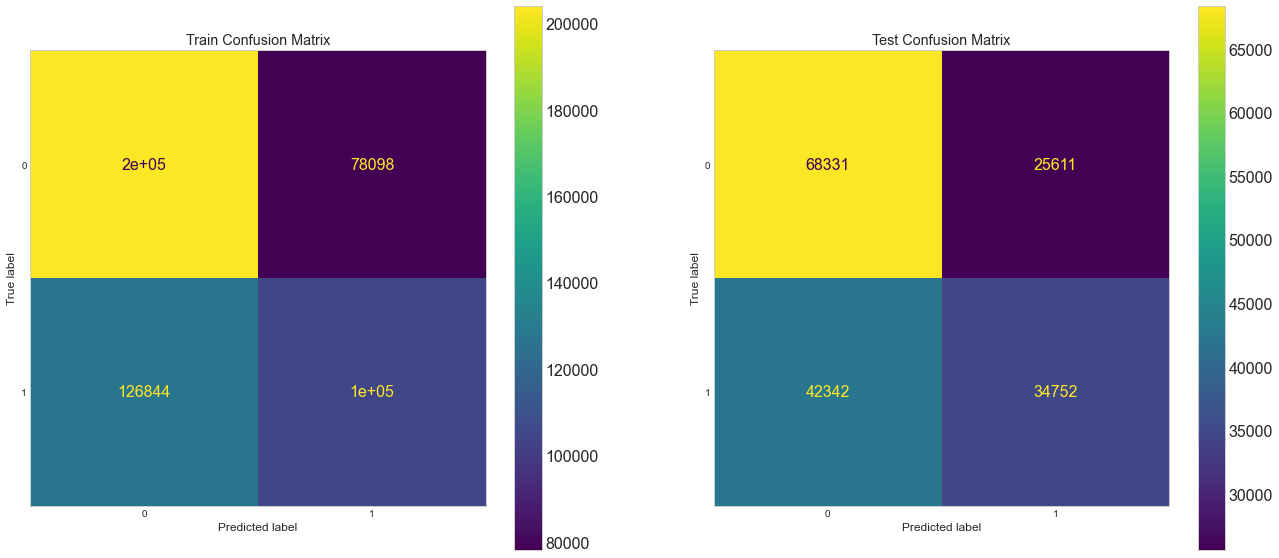

In [68]:
log_model = LogisticRegression()

run_model(log_model, X, y)

### Decision Tree

              precision    recall  f1-score   support

           0       0.62      0.78      0.69    282071
           1       0.60      0.40      0.48    231037

    accuracy                           0.61    513108
   macro avg       0.61      0.59      0.59    513108
weighted avg       0.61      0.61      0.60    513108

              precision    recall  f1-score   support

           0       0.62      0.79      0.69     93942
           1       0.61      0.41      0.49     77094

    accuracy                           0.62    171036
   macro avg       0.61      0.60      0.59    171036
weighted avg       0.61      0.62      0.60    171036



DecisionTreeClassifier()

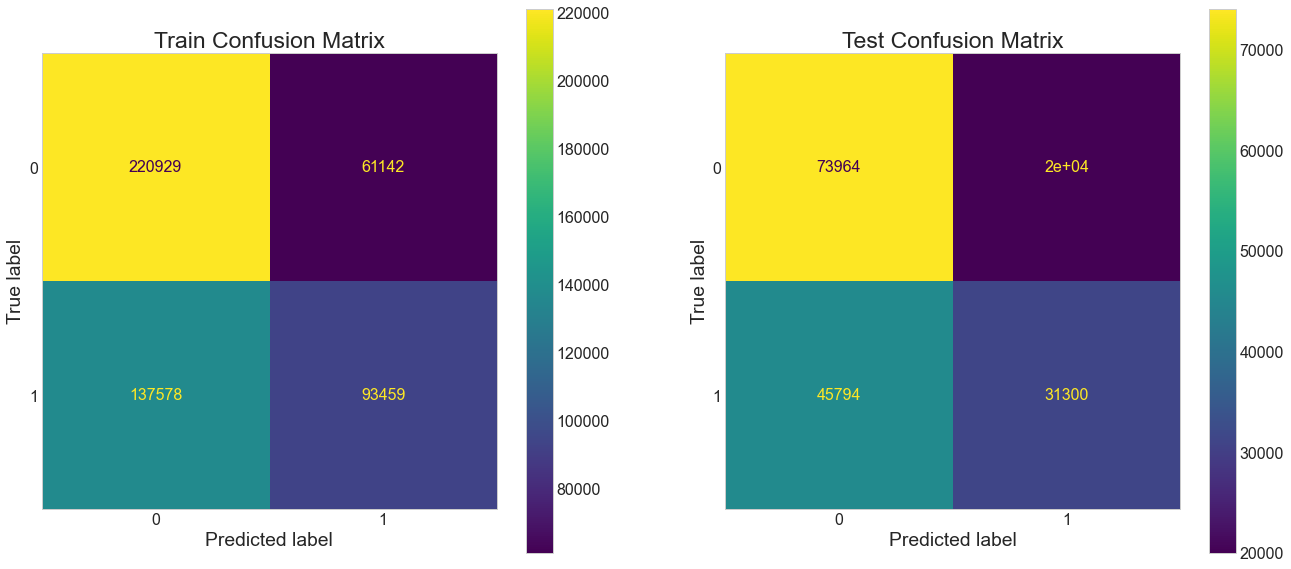

In [69]:
Dtree_model = DecisionTreeClassifier()

run_model(Dtree_model, X, y)

DecisionTreeClassifier()

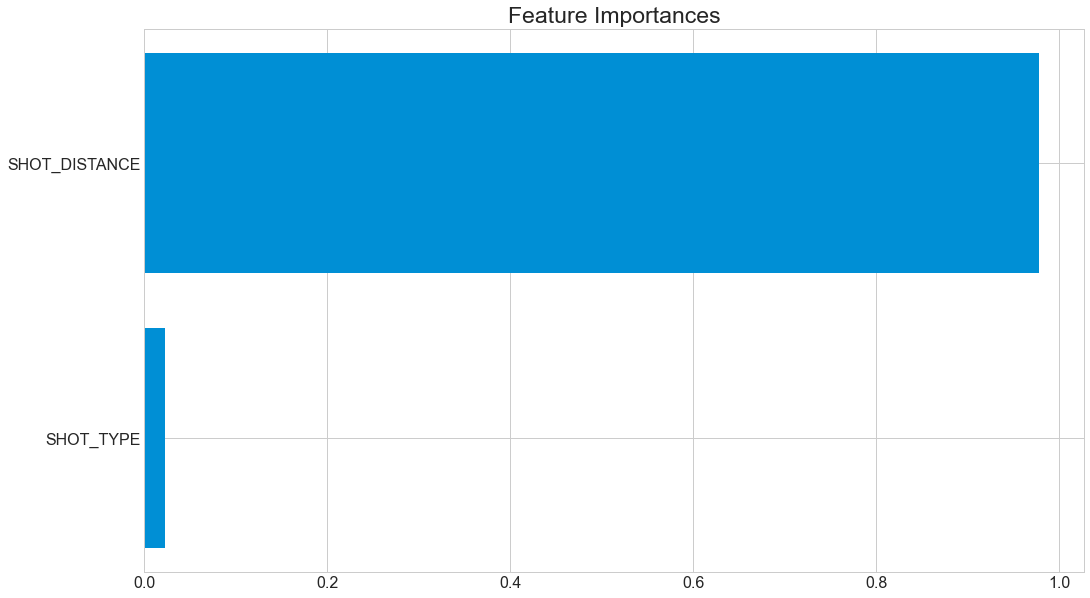

In [70]:
feat_impt(Dtree_model)

### Random Forest

<ipython-input-2-13f317e06e1a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.62      0.78      0.69    282071
           1       0.60      0.40      0.48    231037

    accuracy                           0.61    513108
   macro avg       0.61      0.59      0.59    513108
weighted avg       0.61      0.61      0.60    513108

              precision    recall  f1-score   support

           0       0.62      0.79      0.69     93942
           1       0.61      0.41      0.49     77094

    accuracy                           0.62    171036
   macro avg       0.61      0.60      0.59    171036
weighted avg       0.61      0.62      0.60    171036



RandomForestClassifier()

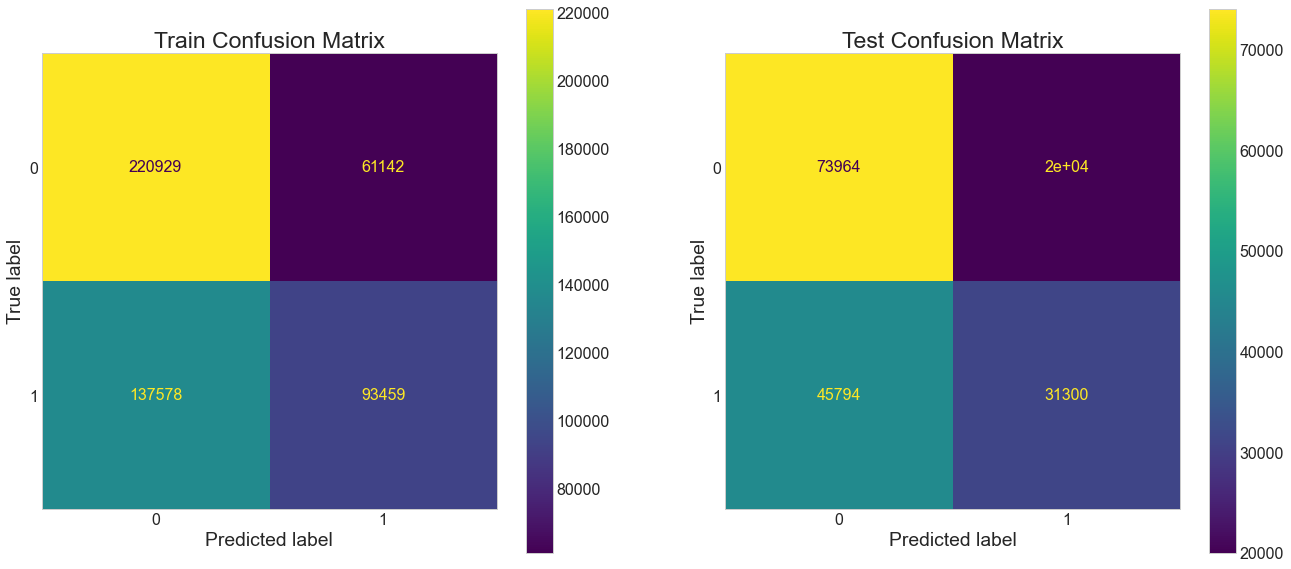

In [71]:
RForest_model = RandomForestClassifier()

run_model(RForest_model, X, y)

RandomForestClassifier()

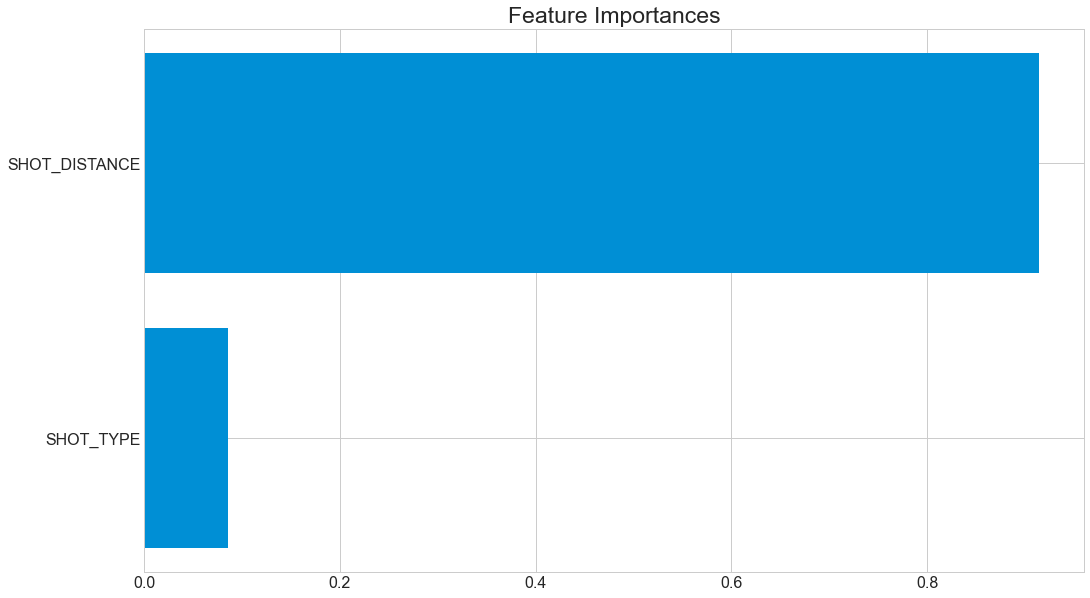

In [72]:
feat_impt(RForest_model)

In [73]:
# feature_importance=pd.DataFrame({
#     'rfc':rfc.feature_importances_,
#     'dt':dt.feature_importances_
# },index=df.drop(columns=['Loan_ID','Loan_Status']).columns)
# feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

# index = np.arange(len(feature_importance))
# fig, ax = plt.subplots(figsize=(18,8))
# rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
# dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
# ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

# ax.legend()
# plt.show()

## Essay

The datasets I used were different not only in size but also in the type of variables. In the small dataset, which compiled player statistics from the 2022-2023 season, there were more variables overall, most of which were numerical and continuous variables. The data in the small dataset were labeled, while the large dataset had some unlabeled data (LOC_X, LOC_Y). While unlabeled, an assumption can be made that these are the coordinates of the basketball court where the shots were attempted from. The large dataset was collected from the 1996-1997 to 1999-2000 seasons. There is a wide time gap in terms of the time period each of the datasets capture. Altogether, the small dataset had 538 observations with 51 columns, while the large dataset had 729649 rows with 26 columns. 

For both datasets, my strategy was to pinpoint a dependent variable that I felt can be impacted by the other variables. In the small dataset, I chose Win Shares, since it measures the impact each player has on a team's success. The variables in the dataset were mostly numerical, with Player Name, their position and team they play for being the only categorical variables. Since the target variable is a numeric, continuous variable, I knew I couldn't use Logistic Regression, since its use is for binary classification and isn't a reliable predictive model for this particular exercise. The models I chose were K-Nearest Neighbors, Decision Tree, and Ridge Regression. My rationale for using these models were its ability to perform regression models and handle numerical data. I chose Ridge Regression because there was multicollinearity between the independent variables, and Ridge can help eliminate the affects of multicollinearity on the model. Ridge shrinks the coefficients of correlated variables towards zero while still including them in the model. Additionally, Ridge Regression serves as a robust tool for preventing overfitting. By constraining the magnitude of the coefficients, it discourages the model from capturing noise in the data, promoting generalization to new, unseen data.  Each model performed well, with Decision Tree having an accuracy score of 88%, followed by KNN at 87.5% and Ridge Regression at 85.4%. While Ridge Regression scored the lowest, I would trust this model to make a business decision on predicting Win Shares, since it takes into account the high multicollinearity among the independent variables. However, I think more data could help reduce the mean squared error, which was high for each model, as well as modifying the parameters to help reduce overfitting.   

The second dataset proved to be more difficult in terms of data preparation and feature selection. The amount of variables in the dataset was half the amount as the small dataset, containing less numerical, continuous features and more categorical variables. As a result, there was a limited amount of independent variables to choose from that I thought would impact the dependent variable, SHOT_MADE_FLAG, which had binary values of 0 for missed shots and 1 for made shots. Unlike the small dataset, where I was able to visualize the correlation coefficients of the variables and identify variables that had high correlation with Win Shares, the large dataset presented a challenge due to its low amount of numerical variables. Despite these challenges, I was able to identify SHOT_TYPE and SHOT_DISTANCE and independent variables to use in the models. While SHOT_TYPE is a categorical variable, classifying shots as a two-pointer or three-pointer with 2 or 3, I felt it could provide value in determining the impact of made and missed shots. Some shots were not classified correctly, so I had to examine the SHOT_ZONE_BASIC column, which described the kind of shot attempt, in conjunction with the shot distance and correct any misclassification. The type of algorithms for this dataset were different from the small dataset, since the dependent variable was categorical and had binary values. Although Decision Trees and KNN can be used for predicting categorical variables, Ridge Regression only performs well in predicting continuous variables, so it would not be an appropriate model to use for this dataset. I decided to use Logistic Regression, Decision Trees, and Random Forest, choosing each for its ability to predict discrete dependent variables and handle the amount of data in the dataset. Initially, I tried to use K-Nearest Neighbors, but it took a long time to computationally provide results. Each model performed well, with Decision Tree and Random Forest having an accuracy score of 62% and Logistic Regression having a 60% accuracy score. Of the three models, I would choose Random Forest, due to its ability to handle any noisy data that could be in the dataset as well the enormous amount of observations. Decision Tree and Logistic Regression, while providing quick computational results, are sensitive to outliers, and with the amount of data in this dataset, outliers could affect the performance of each model and provide incorrect inferences. Nevertheless, I think more features would help improve each model, since there's only two independent variables. 

Selecting and building models for each dataset was an instructive process to learn from. The size and structure of the datasets, as well as their respective variables, helped me consider which Machine Learning algorithms would be appropriate for the data I chose to use. The type of predictive variables selected for each dataset were different, requiring me to contemplate what models to choose and how they would perform with the data. Moving forward, this will provide a solid basis for future Machine Learning analyses.  

## Sources

* https://www.kaggle.com/datasets/jamiewelsh2/nba-per-game-player-statistics-2022-2023-season
* https://www.kaggle.com/datasets/szymonjwiak/nba-advanced-boxscores-1997-2023?select=advanced.csv
* https://www.kaggle.com/datasets/gabrielmanfredi/nba-retro-1995-to-2000-full-basketball-datasets
* https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/#:~:text=How%20do%20we%20decide%20which,and%20then%20aggregate%20the%20result
* https://towardsdatascience.com/selecting-the-correct-predictive-modeling-technique-ba459c370d59#:~:text=Linear%20regression%20is%20to%20be,and%20dependent%20variables%20are%20linear.
* https://www.ibm.com/topics/ridge-regression#:~:text=Ridge%20regression%E2%80%94also%20known%20as,for%20multicollinearity%20in%20regression%20analysis.
* https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
* https://www.basketball-reference.com/about/ws.html
* https://corporatefinanceinstitute.com/resources/data-science/ridge/#:~:text=Multicollinearity%20happens%20when%20predictor%20variables,the%20reliability%20of%20the%20estimates.
* https://medium.com/@psrinivasan028/mastering-ridge-regression-taming-multicollinearity-and-overfitting-in-linear-models-b54b969c65e9